# Food for thought

As at 2012-14, at least 805 million people, or one in nine, worldwide did not have enough to eat. Despite this high amount, it was an improvement on the figures from “1990–92” as the number of hungry people fell by over 200 million. Global trends in hunger reduction, though, mask disparities within and among regions. While Northern Africa has had a consistently low prevalence of hunger (at less than 5 percent), in sub-Saharan Africa, one in four people remain chronically hungry, the highest prevalence of any region in the world. [[1]](https://reliefweb.int/sites/reliefweb.int/files/resources/a-i4030e.pdf)

In 2014, The Food and Agriculture Organization (FAO) of the United Nations labelled Africa the most food insecure continent in the world.[[2]](https://www.vanguardngr.com/2014/03/africa-still-food-insecure-continent-fao/amp/)

In this project, I will look to explore how to the world's food shortage can be solved with a focus on Africa, the most affected, and the setting as 2014.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
import requests

import folium

import dash
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import plotly.express as px
from dash.exceptions import PreventUpdate

In [2]:
# read food production data from (https://tinyurl.com/2nektye4)
prodUrl = 'https://raw.githubusercontent.com/adedam0/Hamoye/main/datasets/Food%20for%20thought/Africa%20Food%20Production%20(2004%20-%202013).csv'
food_prod = pd.read_csv(prodUrl)

In [3]:
food_prod.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [4]:
food_prod.dtypes

Country    object
Item       object
Year        int64
Value       int64
dtype: object

In [5]:
# change the 'Value' column to 'Value(kt)' to treat the values as kilotons
food_prod.rename(columns = {'Value': 'Value(kt)'}, inplace = True)

In [6]:
# group the dataset to know the total quantity of items produced per year by each country
prod_Pcountry_Pyear = food_prod.groupby(['Country', 'Year'])[['Value(kt)']].sum().reset_index()
prod_Pcountry_Pyear.head()

,Country,Year,Value(kt)
0,Algeria,2004,15536
1,Algeria,2005,15667
2,Algeria,2006,16417
3,Algeria,2007,14763
4,Algeria,2008,13841


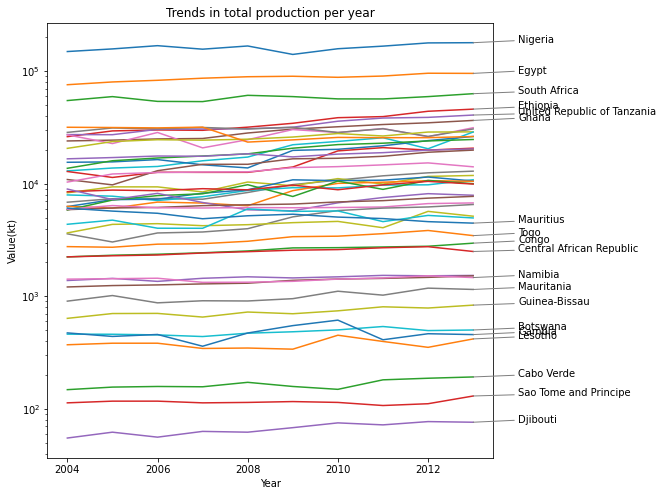

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
countries = list(prod_Pcountry_Pyear[prod_Pcountry_Pyear['Year'] == 2013].sort_values('Value(kt)', ascending = False).Country)
x=0
for i, country in enumerate(countries):
    df = prod_Pcountry_Pyear[prod_Pcountry_Pyear['Country'] == country].reset_index(drop = True)
    ax.plot(df['Year'], df['Value(kt)'])
    ax.set(yscale='log')
    if i in list(range(0,6))+ [30, 31,32,33] +list(range(36,45)):
        ax.annotate(country, xy = (2013, df.loc[9, 'Value(kt)']),xytext = (2014, (df.loc[9, 'Value(kt)'])), 
                    arrowprops=dict(arrowstyle="-",
                                color="0.5",
                                patchB=None,
                                shrinkB=0,
                                connectionstyle="arc3",
                                ),
                    annotation_clip=False)
plt.xlabel('Year')
plt.ylabel('Value(kt)')
plt.title("Trends in total production per year")
plt.show()

# !
Evidently, Nigeria, Egypt and South Africa have consistently been the highest producers per year. The least producers are Djibouti, Sao Tome and Principe and Cape Verde. They are some of the least populous african countries. Could they also be the least populous? Is there a correlation between the quantity of production and population? Let's find out.

###### Import  and clean population data

In [8]:
# data from datacommons.org
popuUrl = 'https://raw.githubusercontent.com/adedam0/Hamoye/main/datasets/Food%20for%20thought/population%20data.csv'
population = pd.read_csv(popuUrl)

pop_04_13 = population.loc[(population['year'] > 2003) & (population['year'] < 2014)]

In [9]:
pop_04_13.columns[0:5]

Index(['year', 'Angola Count_Person', 'Benin Count_Person',
       'Burkina Faso Count_Person', 'Botswana Count_Person'],
      dtype='object')

In [10]:
pop_04_13.columns = ['Year'] + [" ".join(country[:-1]) for country in (col.split(' ') for col in pop_04_13.columns[1:])]
pop_04_13.head()

,Year,Angola,Benin,Burkina Faso,Botswana,Central African Republic,Ivory Coast,Cameroon,Republic of the Congo,Cape Verde,...,São Tomé and Príncipe,Eswatini,Chad,Togo,Tunisia,Tanzania,Uganda,South Africa,Zambia,Zimbabwe
44,2004,18758145,7750004,13030569,1765527,3959875,17970494,17259322,3510468,456617,...,153737,1026286,9734767,5467766,10022277,37379767,26821297,47291610,11550642,12019912
45,2005,19433602,7982225,13421930,1799078,4038382,18354514,17733410,3622775,463032,...,157472,1030579,10096633,5611640,10106771,38450320,27684585,47880601,11856247,12076699
46,2006,20149901,8216897,13829176,1835908,4118069,18754916,18223674,3745141,469170,...,161681,1036092,10457124,5762880,10201214,39548663,28571475,48489459,12173514,12155491
47,2007,20905363,8454793,14252021,1875459,4198010,19171237,18730282,3876119,475060,...,166300,1042652,10818024,5920359,10304726,40681414,29486338,49119759,12502958,12255922
48,2008,21695634,8696921,14689725,1915639,4273366,19605569,19252666,4011486,480842,...,171120,1049945,11183588,6083420,10414433,41853944,30431736,49779471,12848530,12379549


In [11]:
set(prod_Pcountry_Pyear.Country.unique()).difference(set(pop_04_13.columns))

{'Cabo Verde',
 'Congo',
 "Cote d'Ivoire",
 'Sao Tome and Principe',
 'Swaziland',
 'United Republic of Tanzania'}

In [12]:
set(pop_04_13.columns).difference(set(prod_Pcountry_Pyear.Country.unique()))

{'Cape Verde',
 'Eswatini',
 'Ivory Coast',
 'Republic of the Congo',
 'São Tomé and Príncipe',
 'Tanzania',
 'Year'}

In [13]:
prod_Pcountry_Pyear.Country.replace({'Cabo Verde':'Cape Verde',
                           "Cote d'Ivoire":'Ivory Coast',
                           'United Republic of Tanzania':'Tanzania'}, inplace=True)
pop_04_13.rename(columns = {'Eswatini': 'Swaziland',
                            'Republic of the Congo':'Congo',
                            'São Tomé and Príncipe':'Sao Tome and Principe'}, inplace=True)

C:\Users\ADESOYE\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [14]:
#reverse pivoting
pop_04_13 = pd.melt(pop_04_13, 
            id_vars='Year', 
            value_vars=list(pop_04_13.columns[1:]), 
            var_name='Country', 
            value_name='population')
pop_04_13.head()

,Year,Country,population
0,2004,Angola,18758145
1,2005,Angola,19433602
2,2006,Angola,20149901
3,2007,Angola,20905363
4,2008,Angola,21695634


In [15]:
prodXpopu = pd.merge(prod_Pcountry_Pyear, pop_04_13, on = ['Country', 'Year'])
prodXpopu.head()

,Country,Year,Value(kt),population
0,Algeria,2004,15536,32692163
1,Algeria,2005,15667,33149724
2,Algeria,2006,16417,33641002
3,Algeria,2007,14763,34166972
4,Algeria,2008,13841,34730608


In [16]:
prodXpopu['tonnes per capita'] = (1000 * prodXpopu['Value(kt)'] / prodXpopu['population'])
prodXpopu.head()

,Country,Year,Value(kt),population,tonnes per capita
0,Algeria,2004,15536,32692163,0.475221
1,Algeria,2005,15667,33149724,0.472613
2,Algeria,2006,16417,33641002,0.488006
3,Algeria,2007,14763,34166972,0.432084
4,Algeria,2008,13841,34730608,0.398525


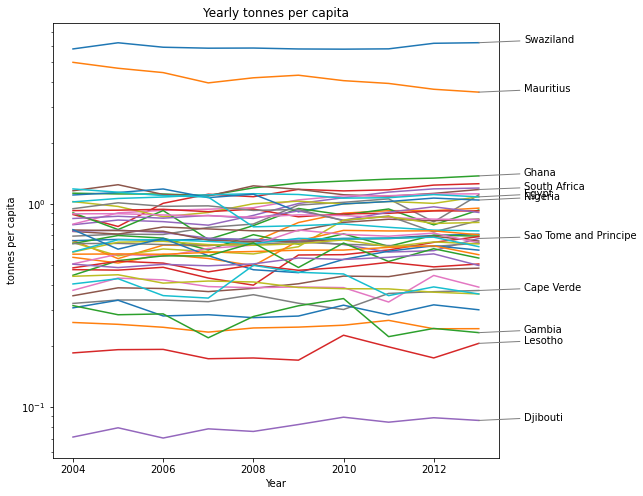

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
countries = list(prodXpopu[prodXpopu['Year'] == 2013].sort_values('tonnes per capita', ascending = False).Country)
for i, country in enumerate(countries):
    df = prodXpopu[prodXpopu['Country'] == country].reset_index(drop = True)
    ax.plot(df['Year'], df['tonnes per capita'])
    ax.set(yscale='log')
    if i in [0,1,2,45,44,43,42] or country in ['Nigeria', 'Egypt', 'South Africa', 'Djibouti', 'Sao Tome and Principe', 'Cape Verde']:
        ax.annotate(country, xy = (2013, df.loc[9, 'tonnes per capita']),xytext = (2014, (df.loc[9, 'tonnes per capita'])), 
                    arrowprops=dict(arrowstyle="-",
                                color="0.5",
                                patchB=None,
                                shrinkB=0,
                                connectionstyle="arc3",
                                ),
                    annotation_clip=False)
plt.xlabel('Year')
plt.ylabel('tonnes per capita')
plt.title("Yearly tonnes per capita")
plt.show()

# !
The trio of Nigeria, Egypt and South Africa produce about a ton per citizen. Sao Tome and Precipe are producing close to the same rate, Cape Verde move closer to the mean value but Djibouti still produce at the worst rate.

# *
*Later Check*
- *type of food Sao Tome and Precipe produce.*
- *what is happening in Djibouti.*
- *what is commonly produced in Swaziland, Mauritius.*
- *correlation between land mass and production.*
- *if location on earth s suitable for crop growth.*

# *

# !
Looking into the correlation between the quantity of items produced and the population...

In [18]:
Countries = prodXpopu.Country.unique()

In [19]:
prodXpopu[prodXpopu['Country'] == 'Djibouti'].corr()

,Year,Value(kt),population,tonnes per capita
Year,1.000000,0.934579,0.998234,0.842941
Value(kt),0.934579,1.000000,0.930201,0.978134
population,0.998234,0.930201,1.000000,0.834268
tonnes per capita,0.842941,0.978134,0.834268,1.000000


In [20]:
corr = []
for country in Countries:
    c = prodXpopu[prodXpopu['Country'] == country].corr()
    corr.append({
        'Country': country,
        'correlation': c.loc['Value(kt)', 'population']
    })
corrDF = pd.DataFrame(corr)
corrDF.head()

,Country,correlation
0,Algeria,0.909686
1,Angola,0.918033
2,Benin,0.921401
3,Botswana,0.782386
4,Burkina Faso,0.863306


In [21]:
!wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json
world_geo = r'world_countries.json'
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [22]:
africa = folium.Map(location=[6.6111, 20.9394], zoom_start = 3, tiles = "OpenStreetMap")

africa.choropleth(
    geo_data=world_geo,
    name="choropleth",
    data=corrDF,
    columns=["Country", "correlation"],
    key_on='feature.properties.name',
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Correlation between population and quantity of items produced",
)


# style_function = lambda x: {'fillColor': '#ffffff', 
#                             'color':'#000000', 
#                             'fillOpacity': 0.1, 
#                             'weight': 0.1}
# highlight_function = lambda x: {'fillColor': '#000000', 
#                                 'color':'#000000', 
#                                 'fillOpacity': 0.50, 
#                                 'weight': 0.1}
# NIL = folium.features.GeoJson(
#     corrDF,
#     style_function=style_function, 
#     control=False,
#     highlight_function=highlight_function, 
#     tooltip=folium.features.GeoJsonTooltip(
#         fields=['Country','correlation'],
#         aliases=['Country: ','Correlation: '],
#         style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
#     )
# )
# africa.add_child(NIL)
# africa.keep_in_front(NIL)
# folium.LayerControl().add_to(africa)

africa

C:\Users\ADESOYE\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


# !
Most african countries have strong positive correlations between quantity of items produced and population

In [23]:
corrDF.sort_values('correlation').head()

,Country,correlation
26,Mauritius,-0.914438
41,Uganda,-0.719567
37,Sudan,-0.263820
44,Zimbabwe,0.043087
15,Gambia,0.156663


# !
Looking into the total energy daily supply per capita...

In [24]:
# read food supply data from (https://tinyurl.com/b2p3rzu)
suppUrl = 'https://raw.githubusercontent.com/adedam0/Hamoye/main/datasets/Food%20for%20thought/Africa%20Food%20Supply%20(2004%20-%202013).csv'
food_supp = pd.read_csv(suppUrl)
food_supp.rename(columns = {'Value': 'Value(kcal/person/day)'}, inplace = True)
food_supp.head()

,Country,Year,Value(kcal/person/day)
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


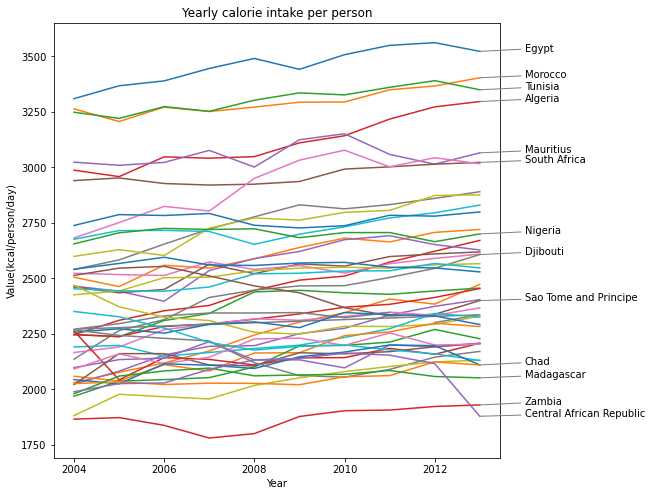

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
countries = list(food_supp[food_supp['Year'] == 2013].sort_values('Value(kcal/person/day)', ascending = False).Country)
for i, country in enumerate(countries):
    df = food_supp[food_supp['Country'] == country].reset_index()
    ax.plot(df['Year'], df['Value(kcal/person/day)'])
    if i in [0,1,2,3,4,5,45,44,43,42,41] or country in ['Nigeria', 'Djibouti', 'Cape Verde', 'Sao Tome and Principe']:
        ax.annotate(country, xy = (2013, df.loc[9, 'Value(kcal/person/day)']),xytext = (2014, (df.loc[9, 'Value(kcal/person/day)'])), 
                    arrowprops=dict(arrowstyle="-",
                                color="0.5",
                                patchB=None,
                                shrinkB=0,
                                connectionstyle="arc3",
                                ),
                    annotation_clip=False)
plt.xlabel('Year')
plt.ylabel('Value(kcal/person/day)')
plt.title("Yearly calorie intake per person")
plt.show()

# !
Zambians were the least nourished in Africa for 9 years. Egyptians, the most nourished, are increasing their daily calorie intake yearly.

# *
*Check*
- *what happened in Zambia?*
- *what do they produce?*
- *how much NIgeria's produce is exported?*
- *what happened in Central African Republic btwn 2012 and 2013?*

# *

# ! 
A minimum calorie of 1819 kcal is also recommended for daily intake per day by the FAO...

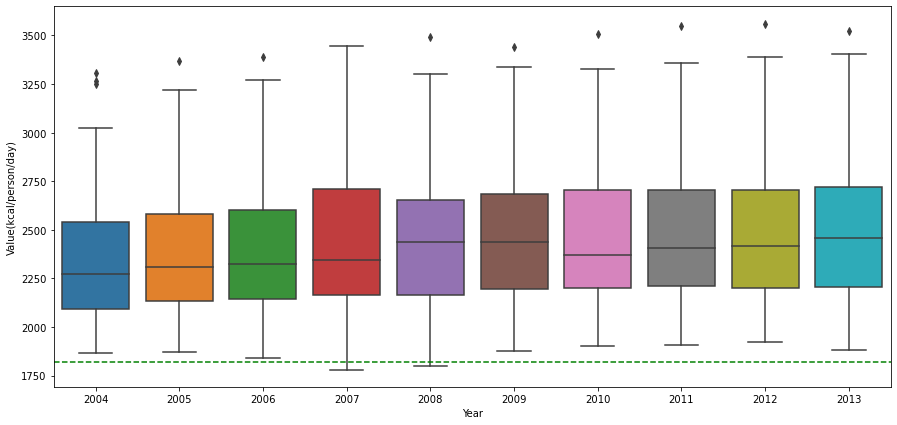

In [26]:
ax, fig = plt.subplots(figsize=[15,7])
b = sns.boxplot(x="Year", y="Value(kcal/person/day)", data=food_supp)
b.axes.axhline(1819, ls='--', c='green', label = 'FAO threshold')
plt.show()

In [27]:
food_supp[food_supp['Value(kcal/person/day)'] < 1819]

,Country,Year,Value(kcal/person/day)
433,Zambia,2007,1781
434,Zambia,2008,1801


# !
Zambia dropped below the recommended daily intake for 2 consecutive years and as seen in the previous lineplot, they were the most likely to go below the threshold

# Staple foods

We will look to explore the most produced (and usually the most the demanded) food items in the world.

In [28]:
#scrape world's staple foods
url = 'https://en.wikipedia.org/wiki/Staple_food'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

table = soup.find('table', class_='wikitable sortable')

staple = []
for row in table.find('tbody').findAll('tr')[2:]:
    data = row.findAll('td')
    rank = data[0].text
    crop = data[1].text
    world_prod_12 = float(data[2].text.split(' ')[0]) *1000
    largest_production_13 = int(data[6].text.split(' ')[0]) *1000
    largest_producers_13 = data[7].text.strip()
    
    staple.append({'rank': rank,
                   'crop': crop,
                   '2012 global production(kt)': world_prod_12,
                   '2013 largest production(kt)' : largest_production_13,
                   '2013 largest producers' : largest_producers_13})

In [29]:
stapleDF = pd.DataFrame(staple)

In [30]:
stapleDF

,rank,crop,2012 global production(kt),2013 largest production(kt),2013 largest producers
0,1,Maize (Corn),873000.0,354000,United States
1,2,Rice,738000.0,204000,China
2,3,Wheat,671000.0,122000,China
3,4,Potatoes,365000.0,96000,China
4,5,Cassava,269000.0,47000,Nigeria
5,6,Soybeans,241000.0,91000,United States
6,7,Sweet potatoes,108000.0,71000,China
7,8,Yams,59500.0,36000,Nigeria
8,9,Sorghum,57000.0,10000,United States
9,10,Plantain,37200.0,9000,Uganda


In [31]:
#largest producers for each item per year
largest_producer_p_item =  food_prod.sort_values("Value(kt)", ascending=False).groupby(["Item", "Year"]).first().reset_index()

In [32]:
# What items do Uganda lead in 2013?
largest_producer_p_item[(largest_producer_p_item['Country'] == 'Uganda') & (largest_producer_p_item['Year'] == 2013)]

,Item,Year,Country,Value(kt)
659,Plantains,2013,Uganda,4375


In [33]:
# What items do Nigeria lead in 2013?
largest_producer_p_item[(largest_producer_p_item['Country'] == 'Nigeria') & (largest_producer_p_item['Year'] == 2013)]

,Item,Year,Country,Value(kt)
99,"Beverages, Fermented",2013,Nigeria,9406
129,Cassava and products,2013,Nigeria,53000
159,"Citrus, Other",2013,Nigeria,3800
249,Crustaceans,2013,Nigeria,29
279,Eggs,2013,Nigeria,650
289,"Fats, Animals, Raw",2013,Nigeria,40
329,"Fruits, Other",2013,Nigeria,2903
359,Groundnut Oil,2013,Nigeria,313
369,Groundnuts (Shelled Eq),2013,Nigeria,2100
449,Millet and products,2013,Nigeria,5000


# !
Our food production data set corroborates the scraped Wikipaedia page data that in 2013, Uganda produced the most plantains and Nigeria produced cassava and yams the most in the world albeit the figures recorded are different.

# Top five items' distribution
Let us look at the production distribution of the top five world's staple foods using plotly dash.

In [34]:
top5staple =  list(stapleDF.crop)[:5]
top5staple[0] = 'Maize'
top5staple[3] = 'Potato'
print(top5staple)

['Maize', 'Rice', 'Wheat', 'Potato', 'Cassava']


##### Import ISO alpha-3 codes for the choropleth map

In [35]:
url2 = 'https://www.iban.com/country-codes'
r = requests.get(url2)
soup = BeautifulSoup(r.text, 'html.parser')
body = soup.find('tbody')
rows = []
for row in body.findAll('tr'):
    data = row.findAll('td')
    rows.append({'Country':data[0].text,
                 'Code': data[2].text})
codes = pd.DataFrame(rows)
codes.head()

,Country,Code
0,Afghanistan,AFG
1,Åland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM


In [36]:
# data cleaning
b = [list(a.values())[0] for a in rows]
u = food_prod['Country'].unique()
missing_c = [u[i] for i in range(len(u)) if u[i] not in b]
print(missing_c)

['Central African Republic', 'Congo', "Cote d'Ivoire", 'Gambia', 'Niger', 'Sudan', 'Swaziland', 'United Republic of Tanzania']


In [37]:
codes[codes['Country'].str.lower().str.contains(missing_c[4].lower())]

,Country,Code
161,Niger (the),NER
162,Nigeria,NGA


In [38]:
codes = codes.replace({"Côte d'Ivoire": "Cote d'Ivoire",
              "Central African Republic (the)": 'Central African Republic',
              "Congo (the)":'Congo',
              "Gambia (the)": 'Gambia',
              "Niger (the)":'Niger',
              'Sudan (the)':'Sudan',
              'Eswatini':'Swaziland',
              'Tanzania, United Republic of':'United Republic of Tanzania'})

In [39]:
choroDf = food_prod.copy()
choroDf = pd.merge(choroDf, codes, on = 'Country')
choroDf

,Country,Item,Year,Value(kt),Code
0,Algeria,Wheat and products,2004,2731,DZA
1,Algeria,Wheat and products,2005,2415,DZA
2,Algeria,Wheat and products,2006,2688,DZA
3,Algeria,Wheat and products,2007,2319,DZA
4,Algeria,Wheat and products,2008,1111,DZA
...,...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009,0,ZWE
23106,Zimbabwe,Crustaceans,2010,0,ZWE
23107,Zimbabwe,Crustaceans,2011,0,ZWE
23108,Zimbabwe,Crustaceans,2012,0,ZWE


In [40]:
app = JupyterDash(__name__)

app.layout = html.Div([
    html.Div([
        dcc.Graph(id='the_graph')
    ]),

    html.Div([
        dcc.Dropdown(
                id='input_crop',
                options=[{'label': i, 'value': i} for i in top5staple],
                value='Maize'),
        dcc.Input(id='input_year', type='number', inputMode='numeric', value=2004,
                  max=2013, min=2004, step =1, required=True)
    ],style={'width': '48%', 'display': 'inline-block'})

])

@app.callback(
    Output('the_graph', 'figure'),
    [Input(component_id='input_crop', component_property='value'),
    Input(component_id='input_year', component_property='value')]
)

def update_graph(crop, year):
    dff = choroDf[food_prod['Item'].str.lower().str.contains(crop.lower())].sort_values('Value(kt)')
    dff = dff[dff['Year'] == year]
    dff = dff.groupby(['Country', 'Code'])[['Value(kt)']].sum().reset_index()

    

    fig = px.choropleth(dff, 
                        locations="Code", 
                        color="Value(kt)", 
                        hover_name="Country", 
                        projection='orthographic', 
                        scope= 'africa',   
                        title='Staple Food Production Distribution',  
                        color_continuous_scale=px.colors.sequential.Plasma)

    fig.update_layout(title=dict(font=dict(size=28),x=0.5,xanchor='center'),
                          margin=dict(l=60, r=60, t=50, b=50))

    return fig
if __name__ == '__main__':
    app.run_server(mode="inline", host="localhost")

# !
Egypt are the largest producers of wheat in Africa for 10 years.
As at 2013, Nigeria produced a large proportion of these  five staple foods in Africa.

# *
- *South Africa maize production dropped noticeably between 2005 to 2006. (Check why)*

# *

### Problems
- Africa remains a net importer of food (i.e: imports more than it exports), although it has 60% of the world’s uncultivated arable land.[[3]](https://www.weforum.org/agenda/2016/01/how-africa-can-feed-the-world/)
- Africa makes up most of least developed countries list.[[4]](https://www.un.org/development/desa/dpad/least-developed-country-category/ldcs-at-a-glance.html)
- That, coupled with Africa having the highest population growth rate in the world, is a recipe for disaster.[[5]](https://statisticstimes.com/demographics/continents-by-population.php)

### Recommended Solution

- There should be more enlightenment especially in the rural areas on family planning to slow population growth and decrease poverty in Africa.
- The unused land spaces should be put to use for farming to scale up production.
- Technological advancements should be made to improve the soil for better product output.

### Conclusion
There are a lot of questions to be answered, problems to solve in tackling world food shortage. Focusing on a region at a time might be the best strategy. Africa is the worst hit region and might be the best place to start.